### Loading updated dataset

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
username = 'recipesadmin'
password = 'HomeUG1000'
host = 'recipesdb.cpamk8qk2wid.us-east-2.rds.amazonaws.com'
port = '5432'  
database = 'postgres'

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

In [5]:
df = pd.read_sql_table("recipes_processed", con=engine)
df.head()

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,...,Time_Difference,Ingredient_Count,Unique_Ingredient_Count,Contains_Healthy,Num_Steps,Complexity_Score,Popularity_Score,Ingredients_Calories_Interaction,Ingredients_Protein_Interaction,Ingredients_Fat_Interaction
0,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,...,-1420,14,14,True,13,173.0,4.943755,7505.4,410.2,336.0
1,Best Blackbottom Pie,PT2H,PT20M,PT2H20M,Make and share this Best Blackbottom Pie recip...,Pie,"c(""1 1/4"", ""1/4"", ""6"", ""1/3"", ""1/4"", ""1/4"", ""2...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",1.0,1.0,...,100,13,11,False,8,35.0,0.693147,5692.7,91.0,250.9
2,Carrot Cake,PT50M,PT45M,PT1H35M,This is one of the few recipes my husband ever...,Dessert,"c(""3"", ""4"", ""1 1/4"", ""2"", ""2"", ""2"", ""2"", ""1"", ...","c(""carrots"", ""eggs"", ""white sugar"", ""all-purpo...",5.0,17.0,...,5,14,14,False,5,28.5,14.451859,7316.4,70.0,379.4
3,Almond Pound Cake,PT1H,PT15M,PT1H15M,Make and share this Almond Pound Cake recipe f...,Dessert,"c(""2/3"", ""3 1/2"", ""1 1/4"", ""4"", ""2 1/4"", ""5"", ...","c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",4.5,3.0,...,45,8,8,False,7,22.5,6.238325,3268.0,55.2,143.2
4,Blueberry Buttertarts,PT25M,PT15M,PT40M,Make and share this Blueberry Buttertarts reci...,Dessert,"c(""12"", ""1"", ""1/2"", ""1"", ""3/4"", ""1/3"", ""1"", ""1...","c(""egg"", ""corn syrup"", ""lemon juice"", ""vanilla...",5.0,4.0,...,10,7,7,True,6,17.0,8.047190,2365.3,29.4,128.8


In [8]:
df.columns

Index(['Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description',
       'RecipeCategory', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'CookTime_Minutes', 'PrepTime_Minutes', 'TotalTime_Minutes',
       'RecipeIngredientQuantities_List', 'RecipeIngredientParts_List',
       'RecipeInstructions_List', 'Calories_per_Serving',
       'Protein_per_Serving', 'Fat_per_Serving', 'Carbs_per_Serving',
       'Protein_to_Calorie', 'Fat_to_Calorie', 'Carb_to_Calorie',
       'Protein_Fat_Ratio', 'Protein_Carb_Ratio', 'Fat_Carb_Ratio',
       'Cook_Prep_Ratio', 'Time_Difference', 'Ingredient_Count',
       'Unique_Ingredient_Count', 'Contains_Healthy', 'Num_Steps',
       'Complexity_Score', 'Popularity_S

### Visualizing the data

##### Macro Distribution Across Recipes

<Figure size 1000x600 with 0 Axes>

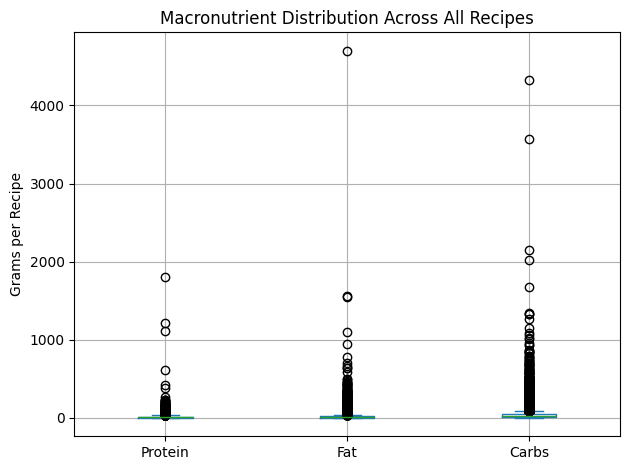

In [9]:
plt.figure(figsize=(10,6))
df_macros = df[['ProteinContent', 'FatContent', 'CarbohydrateContent']]
df_macros.columns = ['Protein', 'Fat', 'Carbs']
df_macros.plot(kind='box')
plt.title("Macronutrient Distribution Across All Recipes")
plt.ylabel("Grams per Recipe")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Top 10 Most Popular Recipes (by Popularity Score)

/var/folders/ly/3c29nd2d79xcjl0g7_kv60600000gn/T/ipykernel_57612/303809401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_popular, x='Popularity_Score', y='Name', palette='viridis')


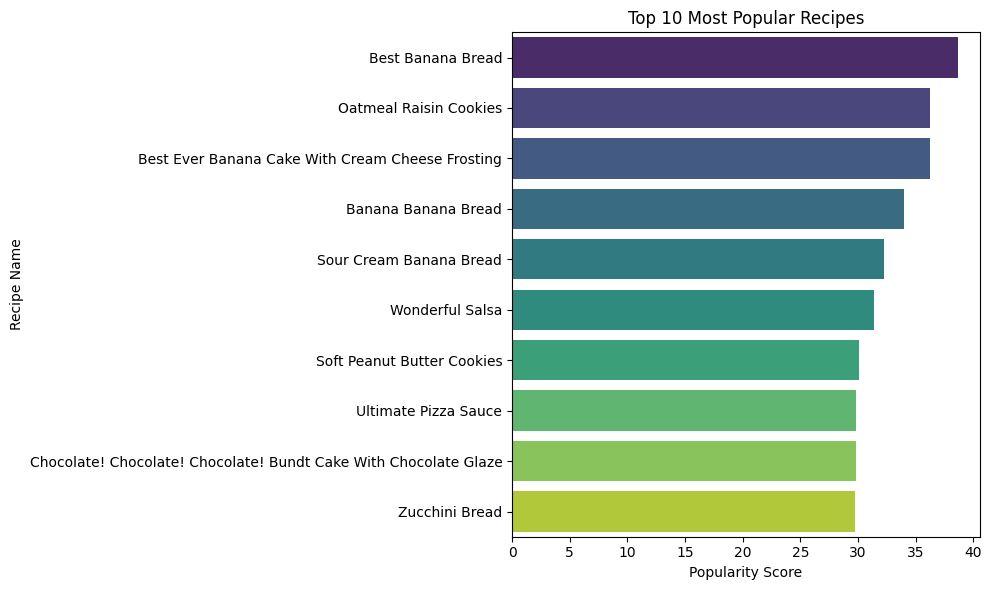

In [10]:
top_popular = df.nlargest(10, 'Popularity_Score')
plt.figure(figsize=(10,6))
sns.barplot(data=top_popular, x='Popularity_Score', y='Name', palette='viridis')
plt.title("Top 10 Most Popular Recipes")
plt.xlabel("Popularity Score")
plt.ylabel("Recipe Name")
plt.tight_layout()
plt.show()

##### Correlation Between Nutrients and Popularity

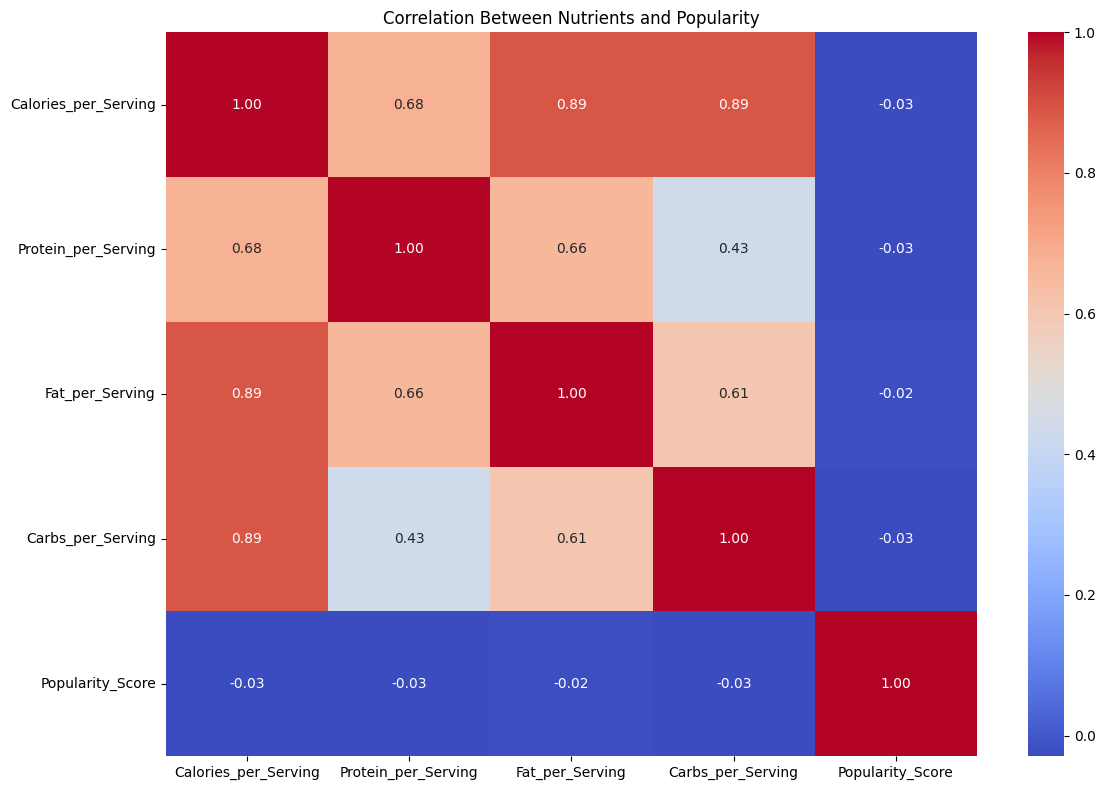

In [11]:
plt.figure(figsize=(12,8))
corr = df[['Calories_per_Serving', 'Protein_per_Serving', 'Fat_per_Serving', 'Carbs_per_Serving', 'Popularity_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Nutrients and Popularity")
plt.tight_layout()
plt.show()

##### Calories vs. Protein: Nutritional Balance in Recipes

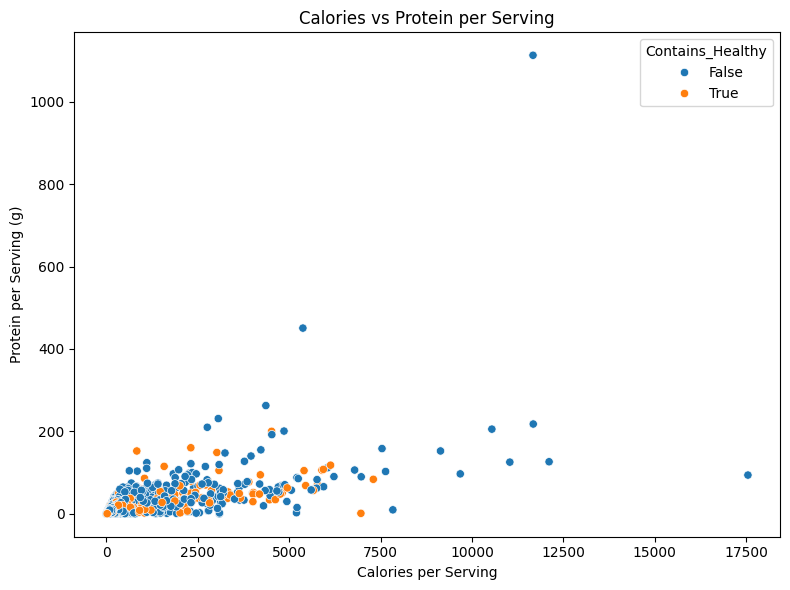

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Calories_per_Serving', y='Protein_per_Serving', hue='Contains_Healthy')
plt.title("Calories vs Protein per Serving")
plt.xlabel("Calories per Serving")
plt.ylabel("Protein per Serving (g)")
plt.tight_layout()
plt.show()

##### Proportion of Recipes with Healthy Ingredients

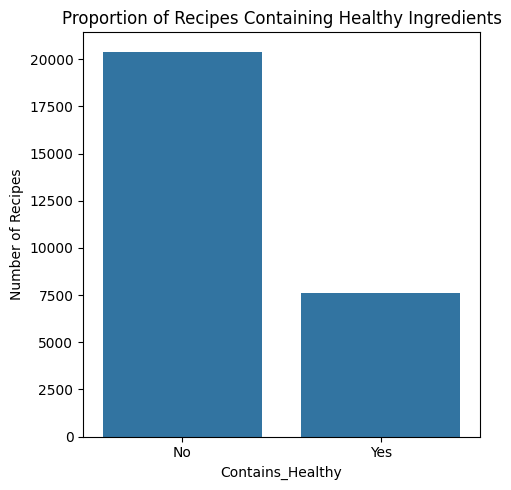

In [13]:
plt.figure(figsize=(5,5))
healthy_counts = df['Contains_Healthy'].value_counts()
sns.barplot(x=healthy_counts.index, y=healthy_counts.values)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Proportion of Recipes Containing Healthy Ingredients")
plt.ylabel("Number of Recipes")
plt.tight_layout()
plt.show()

##### Healthy Recipes by Category

/var/folders/ly/3c29nd2d79xcjl0g7_kv60600000gn/T/ipykernel_57612/1977331331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=healthy_per_cat.values, y=healthy_per_cat.index, palette='Greens')


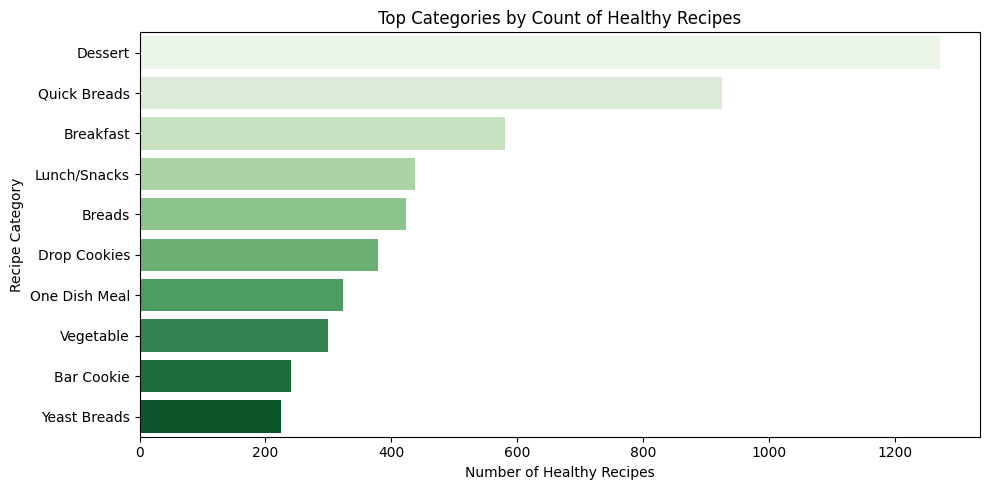

In [15]:
healthy_per_cat = df[df['Contains_Healthy'] == True]['RecipeCategory'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=healthy_per_cat.values, y=healthy_per_cat.index, palette='Greens')
plt.title("Top Categories by Count of Healthy Recipes")
plt.xlabel("Number of Healthy Recipes")
plt.ylabel("Recipe Category")
plt.tight_layout()
plt.show()

##### Low-Carb vs High-Protein Clusters

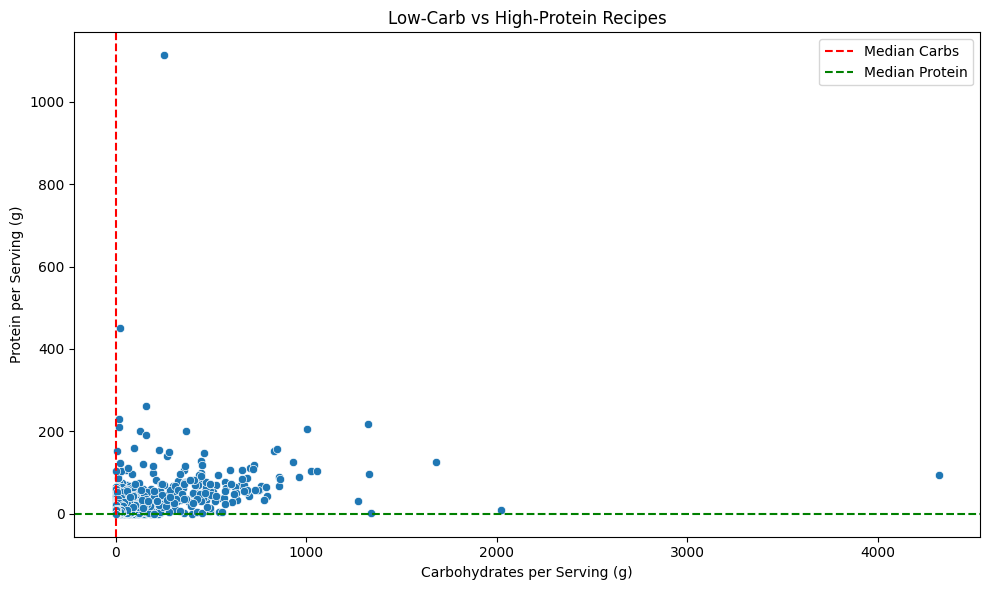

In [16]:
df_cluster = df[['Name', 'Carbs_per_Serving', 'Protein_per_Serving']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Carbs_per_Serving', y='Protein_per_Serving')
plt.axvline(x=df_cluster['Carbs_per_Serving'].median(), color='red', linestyle='--', label='Median Carbs')
plt.axhline(y=df_cluster['Protein_per_Serving'].median(), color='green', linestyle='--', label='Median Protein')
plt.title('Low-Carb vs High-Protein Recipes')
plt.xlabel('Carbohydrates per Serving (g)')
plt.ylabel('Protein per Serving (g)')
plt.legend()
plt.tight_layout()
plt.show()

##### Weight-Loss vs Muscle-Gain Meal Recommendations

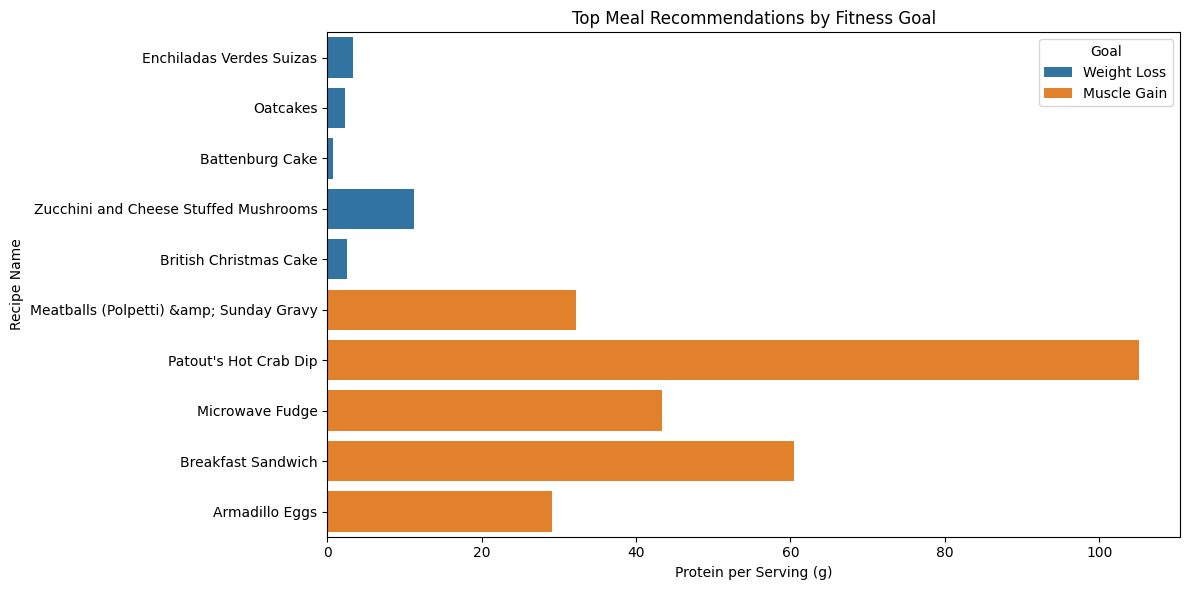

In [17]:
# Weight-loss: Low Calorie + High Fiber
weight_loss = df[(df['Calories_per_Serving'] < 300) & (df['FiberContent'] > 3)].nlargest(5, 'AggregatedRating')

# Muscle-gain: High Protein + High Calorie
muscle_gain = df[(df['Protein_per_Serving'] > 20) & (df['Calories_per_Serving'] > 400)].nlargest(5, 'AggregatedRating')

# Tag and Combine
rec_meals = pd.concat([weight_loss.assign(Goal='Weight Loss'), muscle_gain.assign(Goal='Muscle Gain')])

plt.figure(figsize=(12,6))
sns.barplot(data=rec_meals, x='Protein_per_Serving', y='Name', hue='Goal')
plt.title("Top Meal Recommendations by Fitness Goal")
plt.xlabel("Protein per Serving (g)")
plt.ylabel("Recipe Name")
plt.tight_layout()
plt.show()

##### Recipe Categories with Healthiest Macros

/var/folders/ly/3c29nd2d79xcjl0g7_kv60600000gn/T/ipykernel_57612/556587362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_healthy_cats['Health_Score'], y=top_healthy_cats.index, palette='coolwarm')


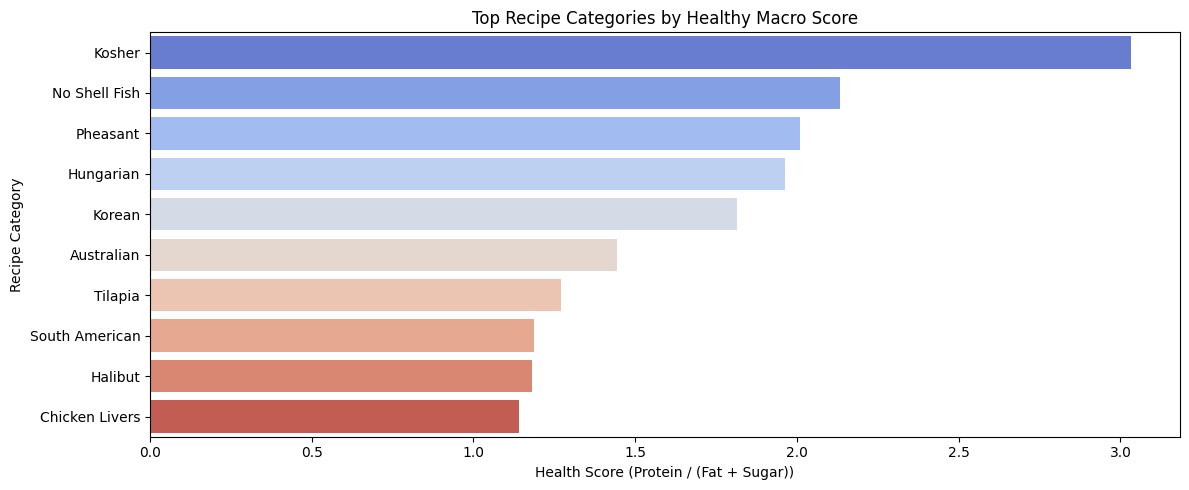

In [18]:
macro_scores = df.groupby('RecipeCategory')[['Protein_per_Serving', 'Fat_per_Serving', 'SugarContent']].mean()
macro_scores['Health_Score'] = macro_scores['Protein_per_Serving'] / (macro_scores['Fat_per_Serving'] + macro_scores['SugarContent'] + 1)

top_healthy_cats = macro_scores.sort_values('Health_Score', ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_healthy_cats['Health_Score'], y=top_healthy_cats.index, palette='coolwarm')
plt.title("Top Recipe Categories by Healthy Macro Score")
plt.xlabel("Health Score (Protein / (Fat + Sugar))")
plt.ylabel("Recipe Category")
plt.tight_layout()
plt.show()

##### Top Recommendations for a Simulated User Profile

/var/folders/ly/3c29nd2d79xcjl0g7_kv60600000gn/T/ipykernel_57612/190155614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sim_user['Calories_per_Serving'], y=sim_user['Name'], palette='Set2')


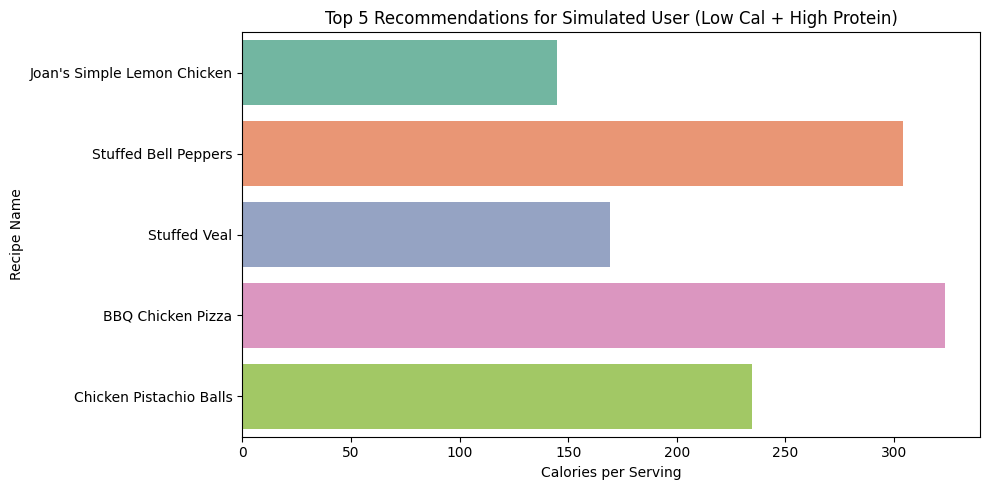

In [19]:
sim_user = df[(df['Calories_per_Serving'] < 350) & (df['Protein_per_Serving'] > 15)].nlargest(5, 'AggregatedRating')

plt.figure(figsize=(10,5))
sns.barplot(x=sim_user['Calories_per_Serving'], y=sim_user['Name'], palette='Set2')
plt.title("Top 5 Recommendations for Simulated User (Low Cal + High Protein)")
plt.xlabel("Calories per Serving")
plt.ylabel("Recipe Name")
plt.tight_layout()
plt.show()